# Regresión Lineal - Esperanza de Vida (OMS)
## Análisis de los factores que influyen en la esperanza de vida

El archivo `Life Expectancy Data.csv` contiene el dataset para el problema de regresión lineal.
Este dataset incluye información sobre esperanza de vida y diversos factores de salud, económicos
y sociales para 193 países durante el período 2000-2015.

**Dataset:** Esperanza de vida (OMS) - Factores que influyen en la esperanza de vida
**Variables:** 22 columnas con 20 variables predictoras
**Observaciones:** 2938 filas representando diferentes países y años

In [205]:
# Computación vectorial y científica para python
import numpy as np

# Librerías para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Librerías adicionales para análisis de datos
import pandas as pd
# llama a matplotlib a embeber gráficas dentro de los cuadernillos
%matplotlib inline

print("Todas las librerías importadas correctamente")

Todas las librerías importadas correctamente


In [206]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
data = pd.read_csv('/content/Life Expectancy Data.csv')
print(data.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [208]:
data = data[['Alcohol', 'Life expectancy ']].dropna()  # Elimina filas con nan
x = data['Alcohol'].values
y = data['Life expectancy '].values
m = y.size

In [209]:
print(x)

[0.01 0.01 0.01 ... 4.43 1.72 1.68]


In [210]:
print(y)

[65.  59.9 59.9 ... 44.8 45.3 46. ]


In [211]:
print(y.size)

2735


In [212]:
def plotData(x, y, title=''):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Esperanza de vida')
    pyplot.xlabel('Consumo de alcohol')

    if title:
        pyplot.title(title)
    pyplot.show()

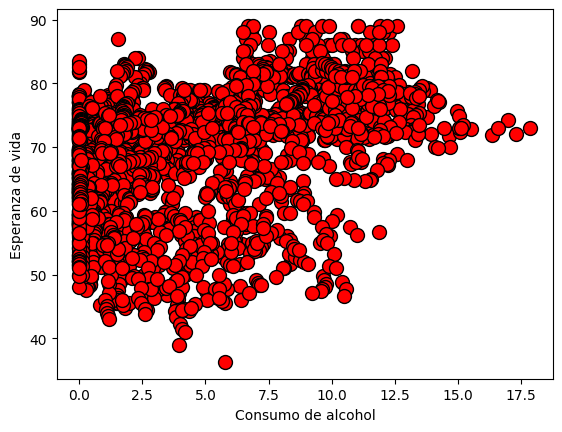

In [213]:
plotData(x, y)

### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresión lineal es minimizar la función de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipótesis $h_\theta(x)$ está dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parámetros del modelo son los valores $\theta_j$. Estos son los valores que se ajustarán al costo mínimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteración ejecuta una actualización
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualización simultánea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parámetros $\theta_j$ son más cercanos a los valores óptimos que permitirán lograr el costo más bajo J($\theta$).


In [214]:
def gradientDescent(x, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(x, theta) - y).dot(x)
        # save the cost J in every iteration
        J_history.append(calcularCosto(x, y, theta))

    return theta, J_history

In [215]:
def calcularCosto(x, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - y))
    return J

In [216]:
print(np.any(np.isnan(x)), np.any(np.isnan(y)), np.any(np.isnan(theta)))

False False False


In [217]:
x = np.stack([np.ones(m), x], axis=1)

In [218]:
print(x)

[[1.   0.01]
 [1.   0.01]
 [1.   0.01]
 ...
 [1.   4.43]
 [1.   1.72]
 [1.   1.68]]


In [219]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 20000
alpha = 0.001

theta, J_history = gradientDescent(x ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history)

Theta encontrada por descenso gradiente: 64.7513, 0.9561
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[np.float64(2323.0679071631503), np.float64(2216.9281212755586), np.float64(2118.700946686715), np.float64(2027.7923756711618), np.float64(1943.6529968287211), np.float64(1865.7746469225742), np.float64(1793.6873140875766), np.float64(1726.9562735366494), np.float64(1665.1794383099773), np.float64(1607.984908922225), np.float64(1555.0287069750882), np.float64(1505.9926789236008), np.float64(1460.5825572215513), np.float64(1418.5261670304387), np.float64(1379.5717675634921), np.float64(1343.4865179567353), np.float64(1310.0550583179775), np.float64(1279.0781973065052), np.float64(1250.3716982454566), np.float64(1223.7651563693414), np.float64(1199.100960364537), np.float64(1176.2333318742926), np.float64(1155.0274371148976), np.float64(1135.3585651891137), np.float64(1117.111368089435), np.float64(1100.1791577596878), np.float64(1084.4632559311933), np.float64(1069.87239

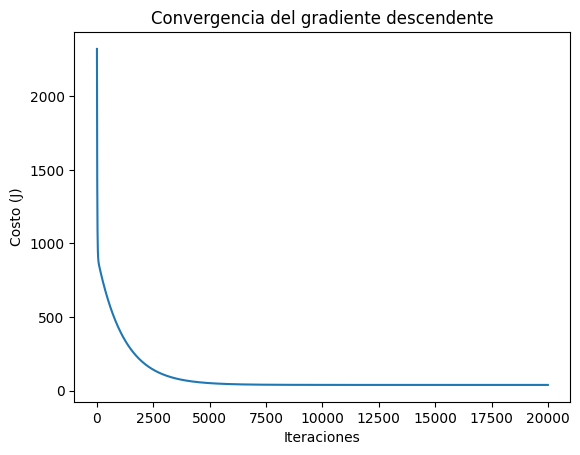

In [220]:
pyplot.plot(range(len(J_history)), J_history)
pyplot.xlabel("Iteraciones")
pyplot.ylabel("Costo (J)")
pyplot.title("Convergencia del gradiente descendente")
pyplot.show()

In [234]:
# Definir tres ejemplos manuales ajustados
x_ej = np.array([
    [1, 0.5],  # Consumo de alcohol = 0.5
    [1, 2.0],  # Consumo de alcohol = 2.0
    [1, 4.5]   # Consumo de alcohol = 4.5
])
y_ej = np.array([65.0, 70.0, 68.0])  # Esperanza de vida con bajada después de 2.0


# Descenso de gradiente con datos de ejemplo
theta_ej = np.zeros(2)
theta_final_ej, J_history_ej = gradientDescent(x_ej, y_ej, theta_ej, alpha, iterations)
print('Theta encontrada por descenso gradiente (datos de ejemplo ajustados): {:.4f}, {:.4f}'.format(*theta_final_ej))


# Realizar 3 ejemplos de predicciones con el modelo ajustado
x_pred = np.array([0.8, 3.0, 5.0])  # Tres valores de consumo de alcohol para predecir
x_pred_with_intercept = np.stack([np.ones(3), x_pred], axis=1)  # Agregar columna de unos
predicciones = np.dot(x_pred_with_intercept, theta_final_ej)

# Mostrar resultados
print("Predicciones de esperanza de vida usando el modelo entrenado con datos manuales ajustados:")
for i, (consumo, esperanza) in enumerate(zip(x_pred, predicciones)):
    print(f"Ejemplo {i+1}: Consumo de alcohol = {consumo:.1f}, Esperanza de vida predicha = {esperanza:.2f} años")

Theta encontrada por descenso gradiente (datos de ejemplo ajustados): 66.1556, 0.6305
Predicciones de esperanza de vida usando el modelo entrenado con datos manuales ajustados:
Ejemplo 1: Consumo de alcohol = 0.8, Esperanza de vida predicha = 66.66 años
Ejemplo 2: Consumo de alcohol = 3.0, Esperanza de vida predicha = 68.05 años
Ejemplo 3: Consumo de alcohol = 5.0, Esperanza de vida predicha = 69.31 años
